## Simulation of SiN loaded LNOI coupler


Thach Nguyen

### This file for calculating the coupling coefficient betwen the ring and waveguide with Air cover

### Importing important python modules

In [1]:
%matplotlib inline

In [2]:
import reme                      # REME module
import numpy as np

********************************************************************************
         Maplotlib mplot3d toolkit3D will be used for 3D plotting.
         No module named 'enthought'
********************************************************************************


### Setting the operating wavelength

In [3]:
wavelength = 1.55e-6             # The waveguide is leaky at this wavelength
reme.set_wavelength(wavelength)

### Defining the material layer thickness parameters

In [4]:
m_linbo3_or = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TM)    # Ordinary index; using built-in Sellmier equation 
m_linbo3_ex = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TE)    # Extradinary index; using built-in Sellmier equation 

m_sin = reme.SellmierMaterial(1, 3.0249, 0.1353406 ** 2, 40314, 1239.842 ** 2, 0, 0,'SiN')  
# Run reme.SellmierMaterial? in a new cell for explantion of parameters when defining material using Sellmier equation
m_sio2 = reme.MaterialSiO2()
m_air = reme.MaterialAir()

In [5]:
# Define anisotropic LiNbO3: X-cut, Y-propagating
m_linbo3_y = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Y')   # Anisotropic LiNbO3 
m_linbo3_z = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Z')   # Anisotropic LiNbO3 

### We are changing the coupling gap to get cross coupling coefficient 20 percent

In [345]:
t_s = 1.5e-6                    # SiO2 bottom thickness
t_c = 1.5e-6                    # Sio2 cover thickness
t_linbo3 = 0.3e-6             # LNOI film thickness
t_sin = 300e-9                # Unetched SiN film thickness
core_width = 1.4e-6             # Waveguide core width
clad_width = 3e-6 # Simulation window width
gap = 1.25e-6
radius = 300e-6

### Slab modes

### With Air cover

In [346]:
core_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_air(t_s + t_sin))
core_te_y.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_y.set_TM(False)
core_te_y.find_modes()
clad_te_y.find_modes()

In [347]:
n_te_core_y = core_te_y.get_effective_index_TE(0).real
n_te_clad_y = clad_te_y.get_effective_index_TE(0).real

In [348]:
core_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_y.set_TE(False)
clad_tm_y.set_TE(False)

In [349]:
core_tm_y.find_modes()
clad_tm_y.find_modes()

In [350]:
n_tm_core_y = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_y = clad_tm_y.get_effective_index_TM(0).real

In [351]:
n_te_clad_y

1.7386315160938541

In [352]:
n_te_core_y

1.898580759383995

In [353]:
core_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_te_z.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_z.set_TM(False)
core_te_z.find_modes()
clad_te_z.find_modes()

In [354]:
n_te_core_z = core_te_z.get_effective_index_TE(0).real
n_te_clad_z = clad_te_z.get_effective_index_TE(0).real

In [355]:
core_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_z.set_TE(False)
clad_tm_z.set_TE(False)

In [356]:
core_tm_z.find_modes()
clad_tm_z.find_modes()

In [357]:
n_tm_core_z = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_z = clad_tm_y.get_effective_index_TM(0).real

In [358]:
n_te_clad_z

1.8008959986492756

In [359]:
n_te_core_z

1.9451758911532857

### Simulate 2D waveguide mode

#### Defining a RWG waveguide geometry from core and cladding slabs

We need to use anisotropic LiNbO3 when defining the waveguides

### With Air cover

In [360]:
clad_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_air(t_s + t_sin))
core_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sin(t_sin) + m_air(t_s))

In [361]:
clad_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_air(t_s + t_sin))
core_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sin(t_sin) + m_air(t_s))

In [362]:
rwg_z = reme.RWG(clad_z(clad_width) + core_z(core_width) + clad_z(clad_width))

In [363]:
# # View the waveguide structure
# rwg_z.view()

In [364]:
guide_straight_z = reme.FDStraight(rwg_z, 101, 401, cell_averaging=True)
guide_straight_z.set_left_boundary(reme.PEC)        
guide_straight_z.set_right_boundary(reme.PEC)

In [365]:
guide_bent_z = reme.FDBent(rwg_z, 101, 401, cell_averaging=True)
guide_bent_z.set_radius(radius)
guide_bent_z.set_left_boundary(reme.PEC)        
guide_bent_z.set_right_boundary(reme.PEC)

In [366]:
guide_straight_z.find_mode(n_te_core_z)

0

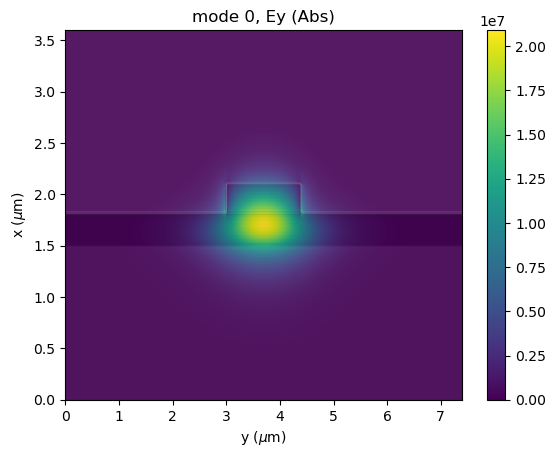

In [367]:
guide_straight_z.plot_mode(0, 'Ey', 'Abs')

In [368]:
neff_straight_z = guide_straight_z.get_mode_effective_index(0).real

In [369]:
guide_bent_z.find_mode(neff_straight_z * 2.0 * np.pi / 1.55e-6 * radius)

0

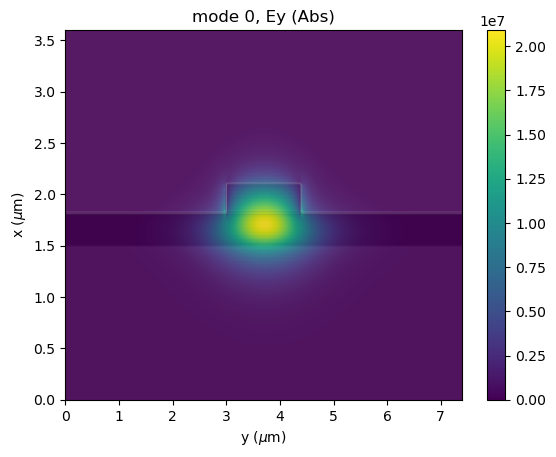

In [370]:
guide_bent_z.plot_mode(0, 'Ey', 'Abs')

### Define the coupler

In [371]:
# Define the coupler section of racetrack ring, it has two waveguide paths: a ring and straight waveguide
coupler = reme.Coupler(2)
coupler.add_bent_guide(0, guide_bent_z)
coupler.add_straight_guide(0, guide_straight_z)

In [372]:
# The bus waveguide is offset by w+G; For the coupler between two rings you need to add a bent waveguide to path 1 as well (similar to the previous cell)
coupler.add_straight_guide(1, guide_straight_z, core_width + gap)

In [373]:
coupler.set_straight_length(0, 0e-6)
coupler.set_coupler_length(100e-6)

In [374]:
# Number of cross-secion sampling points used in the integrations
coupler.set_sampling(101, 401)

In [375]:
# Number of propagation steps along z-direction
coupler.set_num_steps(101)

In [376]:
# Calculate the coupler response
coupler.calculate()

In [377]:
print("Coupler transfer ratio: {}".format(abs(coupler.get_S_reduced(0, 0, 0, 0))**2))
print("Coupler coupling ratio: {}".format(abs(coupler.get_S_reduced(1, 0, 0, 0))**2))


Coupler transfer ratio: 0.9910047689736882
Coupler coupling ratio: 0.00885884926525757


In [378]:
# Open a dialog to plot the transfer matrix evolution
#coupler.plot_transfer_matrix()

In [379]:
abs(coupler.get_S_reduced(0, 0, 0, 0))**2 + abs(coupler.get_S_reduced(1, 0, 0, 0))**2

0.9998636182389458

In [380]:
coupler.get_S(0, 0, 0, 0)

(0.9821860118863313-0.16222024235129193j)

### Scan the straight section length

In [381]:
num_points = 51
lengths = np.linspace(0, 250e-6, num_points)
coupler_cross_coupling_bent_straight = np.zeros(num_points)
coupler_straight_coupling_bent_bent = np.zeros(num_points)
coupler_cross_coupling_straight_bent = np.zeros(num_points)
coupler_straight_coupling_straight_straight = np.zeros(num_points)

In [382]:
for i in range(num_points):
    coupler.set_straight_length(0, lengths[i])
    coupler.set_coupler_length(100e-6 + lengths[i])
    coupler.calculate()
    coupler_cross_coupling_bent_straight[i] = abs(coupler.get_S_reduced(0, 1, 0, 0))**2
    coupler_straight_coupling_bent_bent[i] = abs(coupler.get_S_reduced(0, 0, 0, 0))**2
    coupler_cross_coupling_straight_bent[i] = abs(coupler.get_S_reduced(1, 0, 0, 0))**2
    coupler_straight_coupling_straight_straight[i] = abs(coupler.get_S_reduced(1, 1, 0, 0))**2

In [383]:
print(coupler_cross_coupling_straight_bent * 100)

[ 0.88588493  1.22108148  1.60723094  2.04690274  2.53994307  3.08225712
  3.67453922  4.32030041  5.01324451  5.75262055  6.54258944  7.37976948
  8.26189049  9.18905942 10.15921862 11.17763877 12.23307201 13.33027945
 14.46436418 15.64263307 16.85230852 18.0967134  19.38174315 20.69491627
 22.04266384 23.41629367 24.82192739 26.25202672 27.70962877 29.18668356
 30.69210517 32.21740894 33.75583865 35.31603314 36.89174094 38.47857784
 40.07992136 41.69057088 43.30728399 44.93274057 46.56568344 48.19521016
 49.83234834 51.46630959 53.09902238 54.72619954 56.34797373 57.96478023
 59.56954352 61.16479131 62.74484989]


In [384]:
print(coupler_straight_coupling_bent_bent * 100)

[99.1004769  98.75581061 98.37843173 97.93581136 97.41939168 96.87373145
 96.29318508 95.61720817 94.91604717 94.19888252 93.39021147 92.53849733
 91.64603386 90.7147198  89.74662024 88.65842491 87.61573592 86.49422184
 85.38855913 84.14612389 82.97320041 81.73255305 80.39116168 79.08513239
 77.68407113 76.32836572 74.87497988 73.4755653  71.97737708 70.54313821
 68.92722606 67.36083993 65.88320358 64.29840511 62.60291275 61.09743287
 59.4820421  57.75459167 56.23679227 54.60813901 52.86337404 51.35092982
 49.60491613 47.98061095 46.23942439 44.75294105 43.02767389 41.43519077
 39.72948504 38.29273248 36.61669333]


In [385]:
#coupler.plot_transfer_matrix()

In [386]:
import matplotlib.pyplot as plt

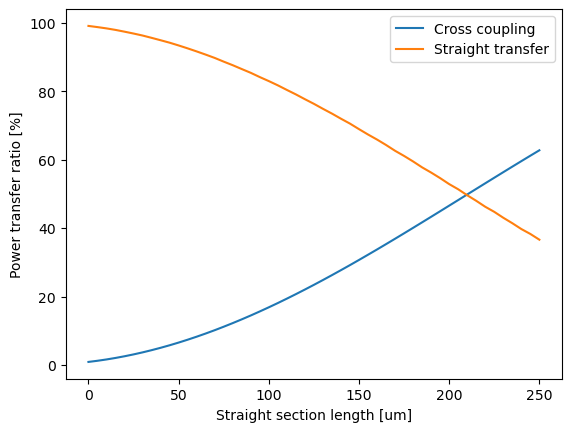

In [387]:
plt.plot(lengths * 1e6, coupler_cross_coupling_straight_bent * 100, label="Cross coupling")
plt.plot(lengths * 1e6, coupler_straight_coupling_bent_bent * 100, label="Straight transfer")
plt.xlabel("Straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend()
plt.savefig("w_1.4um_g_1.25um.png", dpi=300)
plt.show()

In [99]:
print(coupler_cross_coupling_straight_bent)

[0.24790615 0.32432797 0.40610277 0.49014115 0.57357775 0.65536204
 0.73298498 0.80161712 0.86213269 0.91364519 0.9505546  0.97421801
 0.98403565 0.97972644 0.96151267 0.92567857 0.8815394  0.8241282
 0.75916891 0.68261127 0.60368076 0.52132236 0.43589612 0.35367534
 0.27439683 0.20278888 0.13875414 0.08581118 0.04417517 0.01613757
 0.00173727 0.00190651 0.0164065  0.0449095  0.08657285 0.14005438
 0.20394291 0.27588785 0.35498972 0.43783798 0.52142678 0.60602745
 0.68505313 0.75993633 0.8246932  0.8846085  0.92797    0.96146454
 0.97778076 0.98735478 0.97494572]


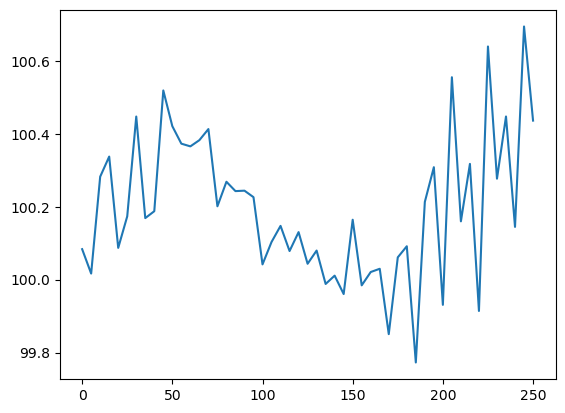

In [100]:
plt.plot(lengths * 1e6, (coupler_cross_coupling_straight_bent + coupler_straight_coupling_bent_bent) * 100, label="Cross coupling")
plt.show()

### Coupler length to achieve critical coupling

Bending radius: 230um

Straight section length: 2811um

For different loss values

In [101]:
ring_radius = 230e-6
straight_section_length = 2811e-6

In [102]:
def round_trip_power_transmission(propagation_loss):
    loss = (2.0 * np.pi * ring_radius + straight_section_length * 2.0) * 100 * propagation_loss
    return 10.0 ** (-loss / 10)    

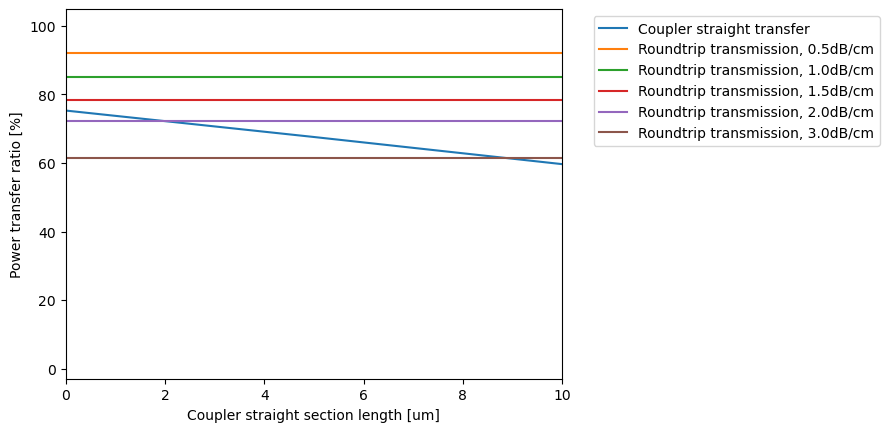

In [103]:
plt.plot(lengths * 1e6, coupler_straight_coupling_bent_bent * 100, label="Coupler straight transfer")
plt.plot(lengths * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(1.5) * 100 for x in lengths], label="Roundtrip transmission, 1.5dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 10)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

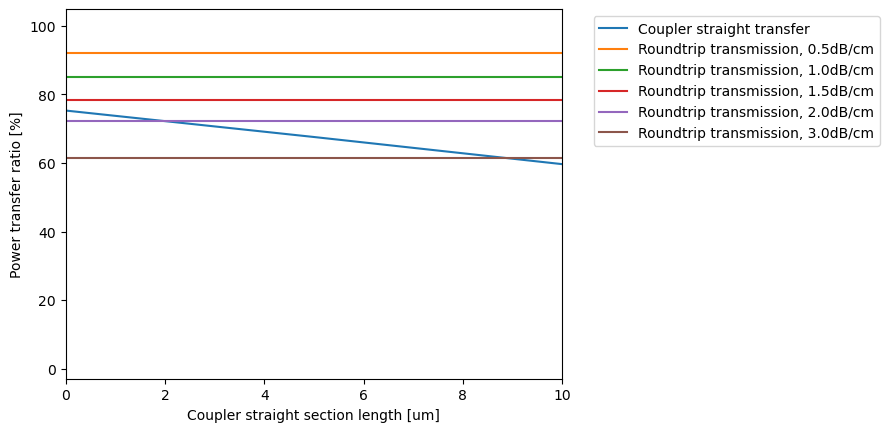

In [104]:
plt.plot(lengths * 1e6, coupler_straight_coupling_bent_bent * 100, label="Coupler straight transfer")
plt.plot(lengths * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(1.5) * 100 for x in lengths], label="Roundtrip transmission, 1.5dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 10)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [105]:
print(coupler_straight_coupling_bent_bent)

[0.75292997 0.67583864 0.59672028 0.51323372 0.42729295 0.34637411
 0.2714878  0.20007043 0.13974399 0.0915425  0.05365363 0.02951077
 0.01961893 0.02409848 0.04261652 0.07633299 0.12114499 0.17829955
 0.24327075 0.31965044 0.39673749 0.47970952 0.56557829 0.64710902
 0.72690643 0.79764645 0.86204353 0.91407041 0.95593469 0.98346762
 0.99990542 0.99793716 0.98380254 0.95538844 0.91193264 0.86055683
 0.79697261 0.72184055 0.64714215 0.56524525 0.47788206 0.3995231
 0.3165459  0.243238   0.17444767 0.12178546 0.07479873 0.04300937
 0.0236659  0.01958769 0.02941547]


In [106]:
a = reme.FMMBent(rwg_z)

In [107]:
a.find_modes?

Signature:
a.find_modes(
    max_num_modes=None,
    nmax=None,
    nmin=0.0,
    clear_existing_modes=True,
    scan_step=None,
    n_imag=0.0,
)
Docstring:
Calculate the waveguide modes

:param int max_num_modes: Maximum number of modes to be found. If not given,
    the value set by ``set_max_waveguide_modes`` will be used
:param float nmax: Maximum value of the real part of the effective indices.
    If not given, the value of maximum waveguide effective index will be used
:param float nmin: Minimum value of the real part of the effective indices
:param float scan_step: The scan step when searching for modes in FMM solvers.
    If not given, the value set by ``set_fmm_scan_step`` will be used
:param bool clear_existing_modes: If true, existing modes will be removed
:param float n_imag: The imaginary part of the effective index when scanning
    for modes.


.. Note:: nmax, nmin and scan_step refer to azimuthal effective index in
    :class:`~rememode.rememode.FMMBent` solver

.. No